<a href="https://colab.research.google.com/github/DavideMichelon10/CV-DP-refresh/blob/main/Feed_forward_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def relu(x):
  return np.where(x>0, x, 0)
def linear(x):
  return x

In [50]:
def feed_forward(inputs, outputs, weights):
  pre_hidden = np.dot(inputs, weights[0]) + weights[1]
  hidden =  1 / (1 + np.exp(-pre_hidden)) # sigmoid
  pred_out = np.dot(hidden, weights[2]) + weights[3]
  mean_squared_error = np.mean(np.square(outputs - pred_out))
  return mean_squared_error

In [51]:
def softmax(x: list): #ritorna un probability vector
  return np.exp(x) / np.sum (np.exp(x))

## Loss functions

In [52]:
# variabili continue
def mse(outputs, y): # (output - y)^2
  return np.mean(np.square(outputs - y))
def mae(outputs, y): # |output - y|
  return np.mean(np.abs(outputs - y))

In [53]:
# variabili categoriche
def binary_cross_entropy(outputs, y): # [1,1,1,0,1,0,0, ... ]
  return - np.mean(y * np.log(outputs) + (1-y) * np.log(1-outputs))

def categorical_cross_entropy(outputs, y):
  return - np.mean(np.log(outputs[np.arange(len(y)), y]))

## Gradient descent

In [54]:
from copy import deepcopy

In [55]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = ff(inputs, outputs, original_weights)

    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = ff(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/ 0.0001
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

In [56]:
x = np.array([[1,1]])
y = np.array([[0]])

W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]
losses = []
epochs = 1000
for epoch in range(epochs):
  W, loss = update_weights(x, y, W, 0.01)
  losses.append(loss)

In [57]:
print(W)

[array([[-0.1253222 , -0.40145403, -0.2238192 ],
       [ 0.25929567, -0.33987227,  0.23808418]], dtype=float32), array([-0.13402238,  0.7412741 , -0.01431506], dtype=float32), array([[ 0.1528],
       [-0.1745],
       [-0.1135]], dtype=float32), array([-0.5516], dtype=float32)]


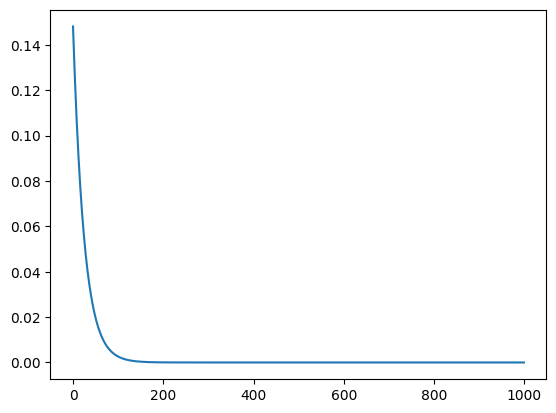

In [58]:
%matplotlib inline
plt.plot(losses)

In [59]:
x = np.array([[10,10]])

pre_hidden = np.dot(x, W[0]) + W[1]
hidden =  1 / (1 + np.exp(-pre_hidden)) # sigmoid
pred_out = np.dot(hidden, W[2]) + W[3]
print(pred_out)

[[-0.49462149]]


## Learn LR

In [73]:

from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [97]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(100):
  weight_value.append(W[0][0][0])
  W = update_weights(x,y,W,0.1)


Text(0, 0.5, 'Weight value')

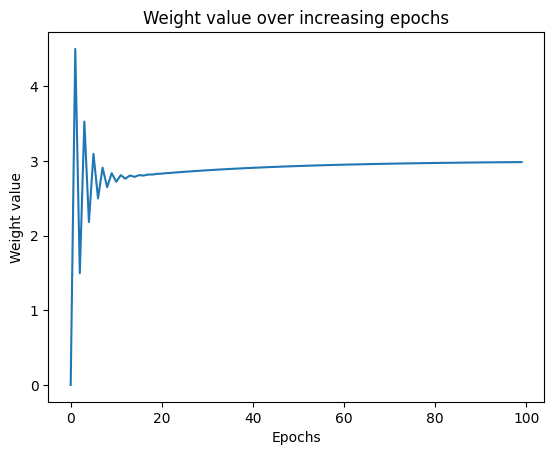

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')